#Install

In [ ]:
%%capture
!sudo add-apt-repository -y ppa:openjdk-r/ppa
!sudo apt-get purge openjdk-*
!sudo apt-get install openjdk-8-jdk
!sudo apt-get install xvfb xserver-xephyr vnc4server python-opengl ffmpeg
!sudo apt-get install xvfb

In [ ]:
%%capture
!pip3 install pyvirtualdisplay
!pip3 install -U colabgymrender
!pip3 install imageio==2.4.1


In [ ]:
# %%capture
# !python -m pip install --upgrade pip wheel==0.38.4 setuptools==65.6.1

In [ ]:
# !pip3 install minerl==0.4.4

In [ ]:
# !pip3 install --upgrade minerl
!pip3 install git+https://github.com/minerllabs/minerl

  Cloning https://github.com/minerllabs/minerl to /tmp/pip-req-build-5qeykfej
  Running command git clone --filter=blob:none --quiet https://github.com/minerllabs/minerl /tmp/pip-req-build-5qeykfej
  Resolved https://github.com/minerllabs/minerl to commit c0c9baa03b5306ffc3acddc849ec4141b6deb98e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/minerllabs/gym (to revision minerl-fix) to /tmp/pip-install-dhoe8fja/gym_3e99710ed7454a78a592f827cc2f54db
  Running command git clone --filter=blob:none --quiet https://github.com/minerllabs/gym /tmp/pip-install-dhoe8fja/gym_3e99710ed7454a78a592f827cc2f54db
  Resolved https://github.com/minerllabs/gym to commit 1db8bb30c16704068ad63c7d8d3af0b2838ffe77
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# https://github.com/freqtrade/freqtrade/issues/8376
# https://stackoverflow.com/questions/69198225/i-get-an-error-when-i-try-to-import-minerl

# %%capture
# !python -m pip install --upgrade pip wheel==0.38.4 setuptools==65.6.1

In [ ]:
# !pip install gym==0.19

In [ ]:
# %%capture
# !pip3 install pyvirtualdisplay
# !pip3 install imageio==2.4.1
# !pip3 install -U colabgymrender

In [ ]:
# !pip install --upgrade minerl

In [ ]:
# import os, sys
# from google.colab import drive

# drive.mount('/content/drive')
# nb_path = '/content/notebooks'
# os.symlink('/content/drive/MyDrive/Colab Notebooks', nb_path)
# sys.path.insert(0,nb_path)

In [ ]:
# !pip install decorator==4.0.2 ipython==7.34.0

In [ ]:
# !python -m pip install --upgrade pip wheel==0.38.4 setuptools==65.6.1

In [ ]:
# !pip install --target=$nb_path git+https://github.com/minerllabs/minerl

In [ ]:
# !pip3 install gym==0.19.0

In [ ]:
# !pip install minerl==0.3.7

In [ ]:
# !sudo apt-get install xvfb

#Import

In [ ]:
import os

import numpy as np

import gym
#from gym.wrappers import Monitor
import minerl

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline

from tqdm.notebook import tqdm
from colabgymrender.recorder import Recorder
from pyvirtualdisplay import Display

import logging
logging.disable(logging.ERROR) # reduce clutter, remove if something doesn't work to see the error logs.

import cv2
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

np.__version__  # '1.21.6' => that this is reading from our ~/mine_env directory

'1.22.4'

In [ ]:
# !pip show minerl

In [ ]:
disp = Display(visible=0, backend="xvfb")
disp.start();

#Initializing the environment

In [ ]:
env = gym.make('MyMineRLTreechop-v0')
#env = Monitor(env, './video', force=True)
env.seed(10)

In [ ]:
# env.close()

In [ ]:
import time

t0=time.time()
obs = env.reset()  # First obs is thrown away...
print(f"{(time.time()-t0):.2f}sec for env.reset")
# 275.65sec = 4mins for first time, 80.73sec second time (due to compilation of java files?)

94.14sec for env.reset


0.20sec for env.step


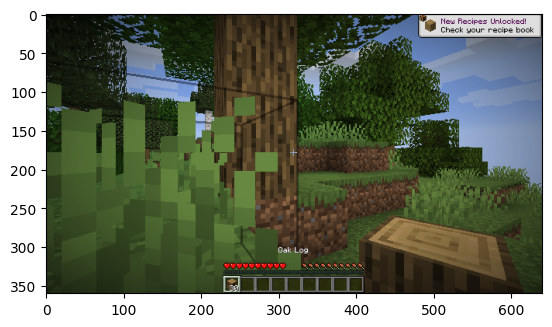

0.15sec for env.step


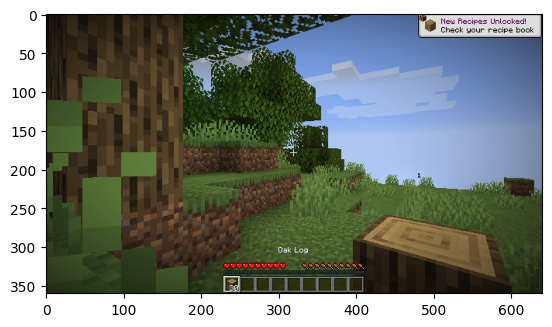

0.11sec for env.step


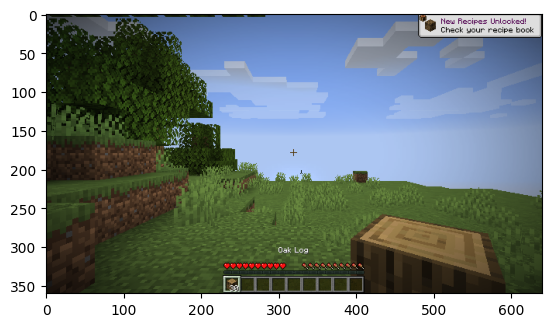

0.15sec for env.step


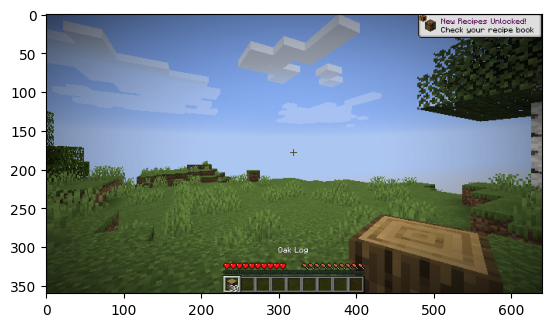

0.12sec for env.step


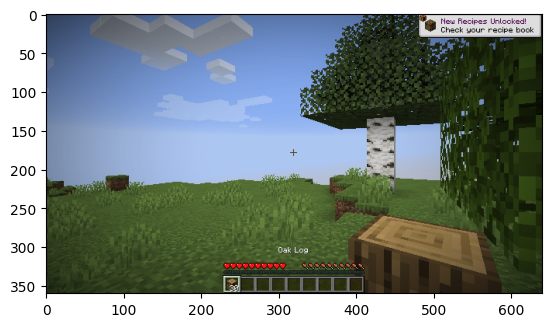

0.12sec for env.step


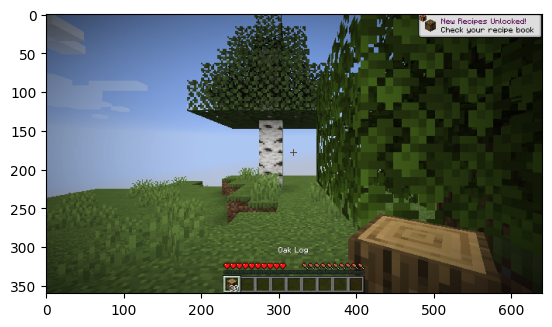

0.15sec for env.step


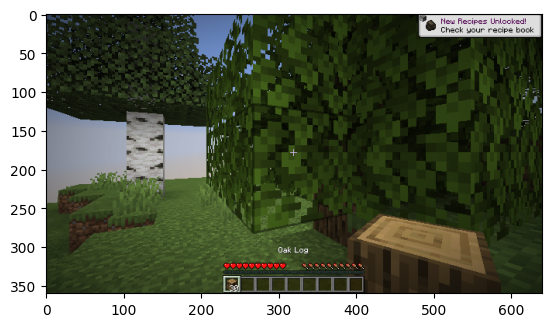

0.17sec for env.step


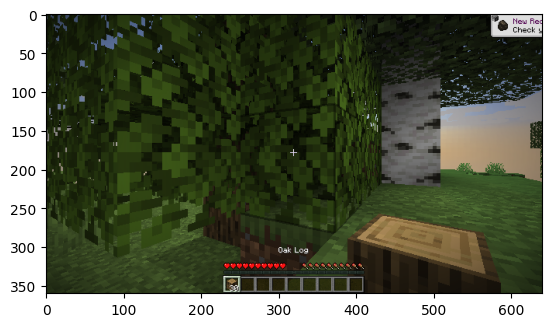

0.25sec for env.step


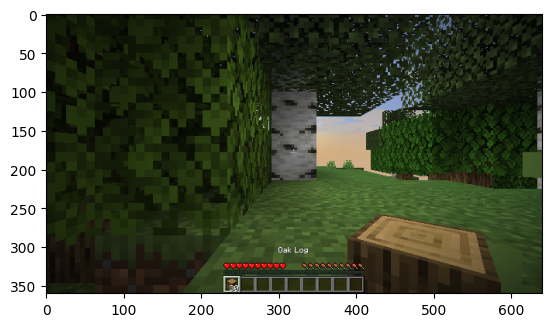

0.13sec for env.step


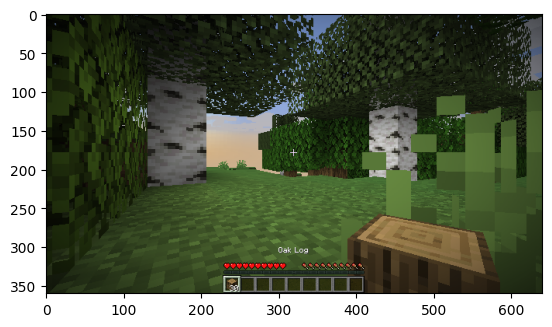

0.16sec for env.step


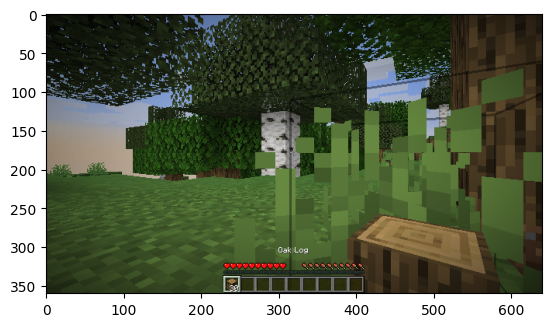

0.15sec for env.step


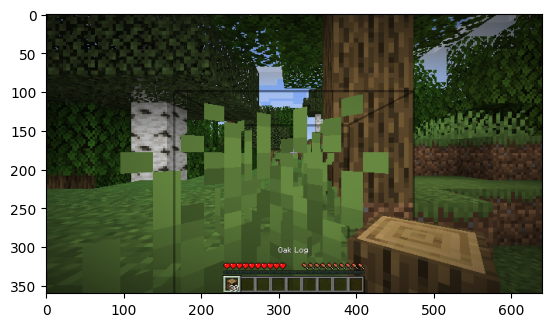

0.14sec for env.step


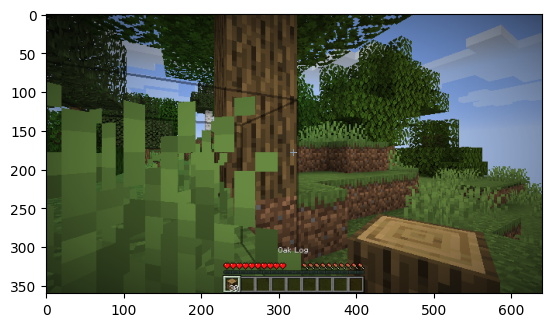

0.23sec for env.step


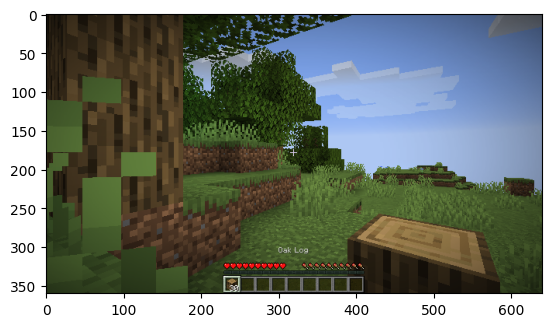

0.15sec for env.step


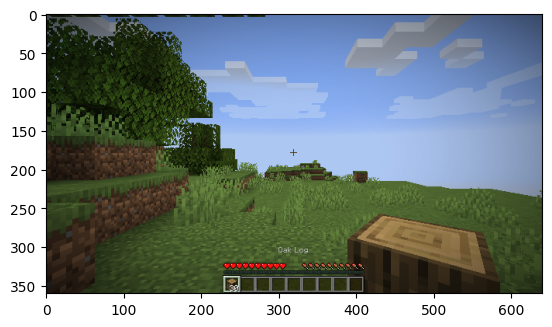

0.13sec for env.step


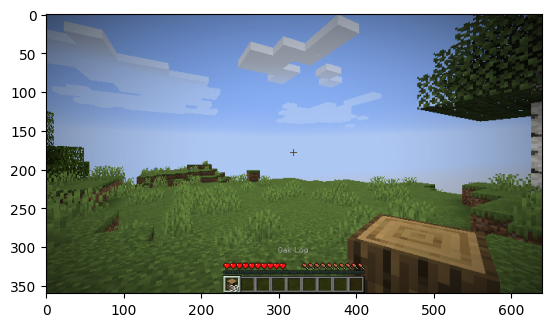

0.12sec for env.step


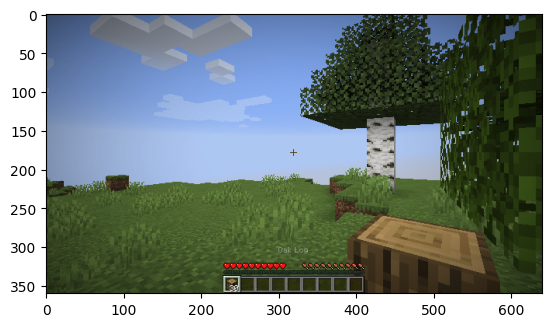

0.13sec for env.step


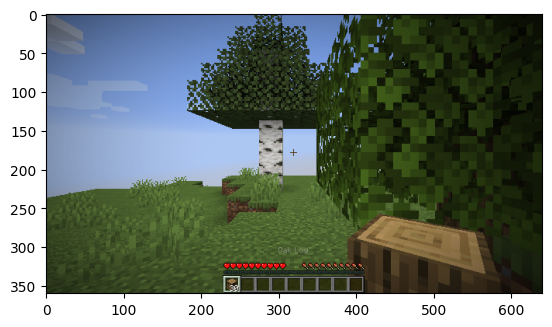

0.16sec for env.step


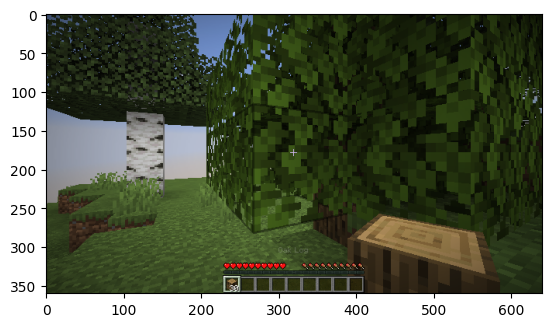

0.14sec for env.step


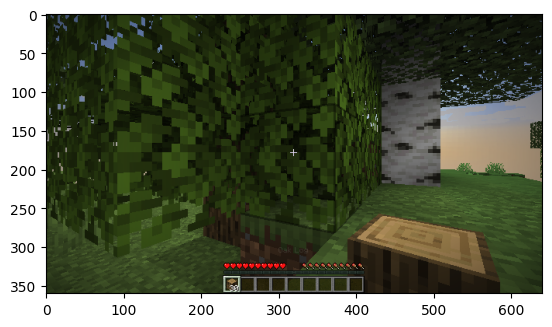

0.18sec for env.step


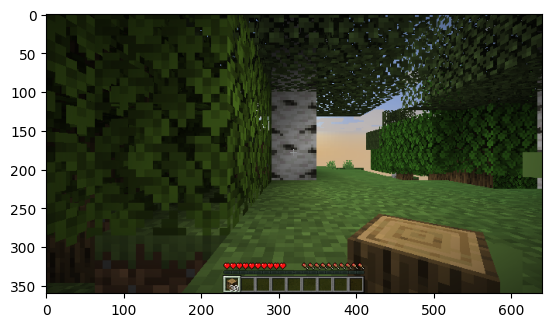

'9.26sec for whole spin'

In [ ]:
# Now that Steve has been spawned, do some actions...
t0=time.time()
img_array = []

done, iter = False, 0
while not done:
    ac = env.action_space.noop()
    # Spin around to see what is around us
    ac["camera"] = [0, +30]  # (pitch, yaw) deltas in degrees : +30 => turn to right

    t1=time.time()
    obs, reward, done, info = env.step(ac)
    #print(obs, reward, info)  # NB: Yikes : obs is only the image!
    #  obs = Dict(pov:Box(low=0, high=255, shape=(360, 640, 3)))
    #print(pov.shape) # (360, 640, 3)  Image spec agrees with docs!
    print(f"{(time.time()-t1):.2f}sec for env.step")  # Approx 0.25sec per step

    pov = obs["pov"]

    #env.render()  # This does an internal cv2.imshow that colab rejects
    #cv2_imshow(pov[:, :, ::-1])
    #cv2.waitKey(1)

    plt.imshow(pov)
    plt.show()

    img_array.append(pov)

    iter +=1
    if iter>20: done=True

f"{(time.time()-t0):.2f}sec for whole spin"

#Replay Memory

In [ ]:
from collections import namedtuple, deque
import random

Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

#Action

In [ ]:
import math

EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000

def look_right(env):
    ac = env.action_space.noop()
    ac["camera"] = [0, +30]
    ac["attack"] = 1
    return ac

def look_left(env):
    ac = env.action_space.noop()
    ac["camera"] = [0, -30]
    ac["attack"] = 1
    return ac

def look_up(env):
    ac = env.action_space.noop()
    ac["camera"] = [10, 0]
    ac["attack"] = 1
    return ac

def look_down(env):
    ac = env.action_space.noop()
    ac["camera"] = [-10, 0]
    ac["attack"] = 1
    return ac

def run_forward(env):
    ac = env.action_space.noop()
    ac["forward"] = 1
    ac["jump"] = 1
    ac["attack"] = 1
    return ac

def attack(env):
    ac = env.action_space.noop()
    ac["attack"] = 1
    return ac

def jump(env):
    ac = env.action_space.noop()
    ac["jump"] = 1
    ac["attack"] = 1
    return ac

steps_done = 0

def select_action(state, env):
    # global steps_done
    # sample = random.random()
    # eps_threshold = EPS_END + (EPS_START - EPS_END) * \
    #     math.exp(-1. * steps_done / EPS_DECAY)
    # steps_done += 1
    # if sample > eps_threshold:
    #     with torch.no_grad():
    #         # t.max(1) will return the largest column value of each row.
    #         # second column on max result is index of where max element was
    #         # found, so we pick action with the larger expected reward.
    #         #print(policy_net(state).max(1)[1].view(1, 1))
    #         return policy_net(state).max(1)[1].view(1, 1)
    # else:
    #     #print(env.action_space.sample())
    #     return torch.tensor([[random.randint(0, 6)]], device=device, dtype=torch.long)

    with torch.no_grad():
        # t.max(1) will return the largest column value of each row.
        # second column on max result is index of where max element was
        # found, so we pick action with the larger expected reward.
        #print(policy_net(state).max(1)[1].view(1, 1))
        return policy_net(state).max(1)[1].view(1, 1)


def actions(env, ac):
#     global steps_done
#     sample = random.random()
#     eps_threshold = EPS_END + (EPS_START - EPS_END) * \
#         math.exp(-1. * steps_done / EPS_DECAY)
#     steps_done += 1
#     if sample > eps_threshold:
#         ac = random.randint(0, 6)
#     else:
#         ac = net_action(state)
    ac = ac[0][0]
    if ac == 0:
        return attack(env)
    elif ac == 1:
        return run_forward(env)
    elif ac == 2:
        return jump(env)
    elif ac == 3:
        return look_down(env)
    elif ac == 4:
        return look_up(env)
    elif ac == 5:
        return look_right(env)
    elif ac == 6:
        return look_left(env)

In [ ]:
def net_action(state, model):
    with torch.no_grad():
        # t.max(1) will return the largest column value of each row.
        # second column on max result is index of where max element was
        # found, so we pick action with the larger expected reward.
        return model(state)[0].max(1)[1].view(1, 1), model(state)[1].max(1)[1].view(1, 1)

#DQN

In [ ]:
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

input_shape = (3, 64, 64)
output_dim = 7

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):
    def __init__(self, input_shape, output_dim):
        super().__init__()
        n_input_channels = input_shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 32, kernel_size=8, stride=4),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
        )

        self.camera = nn.Linear(1024, 121)
        self.buttons = nn.Linear(1024, 8641)

    def forward(self, observations):
        cnn_output = self.cnn(observations)
        camera_output = self.camera(cnn_output)
        buttons_ouput = self.buttons(cnn_output)

        return camera_output, buttons_ouput

class DQNLstm(nn.Module):
    def __init__(self, input_shape, output_dim):
        super().__init__()
        n_input_channels = input_shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 32, kernel_size=8, stride=4),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
        )

        self.lstm = nn.LSTM(512, 512, num_layers=2, batch_first=True)

        self.camera = nn.Linear(512, 121)
        self.buttons = nn.Linear(512, 8641)

    def forward(self, observations, hidden):
        cnn_output = self.cnn(observations)
        lstm_output, hidden = self.lstm(cnn_output.unsqueeze(1), hidden)
        camera_output = self.camera(lstm_output[:, -1, :])
        buttons_ouput = self.buttons(lstm_output[:, -1, :])

        return camera_output, buttons_ouput, hidden

class CnnLstm(nn.Module):
    def __init__(self, input_shape=(3, 128, 128)):
        super().__init__()
        n_input_channels = input_shape[0]

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=2),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=5, stride=2),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=5, stride=2),
            nn.BatchNorm2d(128),

        )

        x = torch.rand(1, *input_shape)
        x = self.cnn(x)
        self.flat_size = x.view(x.size(0), -1).size(1)

        self.flatten = nn.Linear(self.flat_size, 512)
        self.lstm = nn.LSTM(512, 512, num_layers=2, batch_first=True)

        self.camera = nn.Linear(512, 121)
        self.buttons = nn.Linear(512, 8641)

    def forward(self, observations, hidden):
        cnn_output = self.cnn(observations)
        cnn_output = cnn_output.view(cnn_output.size(0), -1)
        flatten_ouput = self.flatten(cnn_output)
        lstm_output, hidden = self.lstm(flatten_ouput.unsqueeze(1), hidden)
        camera_output = self.camera(lstm_output[:, -1, :])
        buttons_ouput = self.buttons(lstm_output[:, -1, :])

        return camera_output, buttons_ouput, hidden

In [ ]:
# policy_net = DQN(input_shape, output_dim).to(device)

# # policy_net.load_state_dict(torch.load('/content/treechop.pth'))
# # policy_net.eval()

# target_net = DQN(input_shape, output_dim).to(device)
# target_net.load_state_dict(policy_net.state_dict())

In [ ]:
# is_ipython = 'inline' in matplotlib.get_backend()
# if is_ipython:
#     from IPython import display

# episode_durations = []


# def plot_durations(show_result=False):
#     plt.figure(1)
#     durations_t = torch.tensor(episode_durations, dtype=torch.float)
#     if show_result:
#         plt.title('Result')
#     else:
#         plt.clf()
#         plt.title('Training...')
#     plt.xlabel('Episode')
#     plt.ylabel('Duration')
#     plt.plot(durations_t.numpy())
#     # Take 100 episode averages and plot them too
#     if len(durations_t) >= 100:
#         means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
#         means = torch.cat((torch.zeros(99), means))
#         plt.plot(means.numpy())

#     plt.pause(0.001)  # pause a bit so that plots are updated
#     if is_ipython:
#         if not show_result:
#             display.display(plt.gcf())
#             display.clear_output(wait=True)
#         else:
#             display.display(plt.gcf())

In [ ]:
# BATCH_SIZE = 128
# GAMMA = 0.99
# LR = 1e-4

# optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
# memory = ReplayMemory(10000)

# def optimize_model():
#     if len(memory) < BATCH_SIZE:
#         return
#     transitions = memory.sample(BATCH_SIZE)
#     batch = Transition(*zip(*transitions))
#     #print(batch.state)

#     non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
#                                           batch.next_state)), device=device, dtype=torch.bool)
#     non_final_next_states = torch.cat([s for s in batch.next_state
#                                                 if s is not None])
#     state_batch = torch.cat(batch.state)
#     #print(state_batch.shape)
#     action_batch = torch.cat(batch.action)
#     #action_batch =  torch.unsqueeze(action_batch, 0)
#     #print(action_batch.shape)
#     reward_batch = torch.cat(batch.reward)

#     state_action_values = policy_net(state_batch).gather(1, action_batch)

#     next_state_values = torch.zeros(BATCH_SIZE, device=device)
#     with torch.no_grad():
#         next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]

#     # Compute the expected Q values
#     expected_state_action_values = (next_state_values * GAMMA) + reward_batch

#     # Compute Huber loss
#     criterion = nn.SmoothL1Loss()
#     loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

#     # Optimize the model
#     optimizer.zero_grad()
#     loss.backward()
#     # In-place gradient clipping
#     torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
#     optimizer.step()

#Train


In [ ]:
device

device(type='cuda')

In [ ]:
from itertools import count

TAU = 0.005

replay = deque(maxlen=10000)

if torch.cuda.is_available():
    num_episodes = 1
else:
    num_episodes = 1

steps = 0
total_rewards = [0]

for i_episode in range(num_episodes):
    print('Episode: ' + str(i_episode))
    # Initialize the environment and get it's state
    # obs, info = env.reset()
    # state = obs["pov"]
    pov = cv2.resize(pov, (64, 64)).astype(np.float32)
    # state = torch.Tensor(pov.astype(np.float32)).resize_(64, 64, 3)
    state = pov.transpose(2, 0, 1) / 255.0
    #state = torch.Tensor(pov.astype(np.float32)).resize_(3, 64, 64)
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action = select_action(state, env)
        ac = actions(env, action)
        obs, reward, done, info = env.step(ac)
        steps += 1
        total_rewards.append(reward+total_rewards[-1])

        if steps % 100 == 0:
            print('Steps = ' + str(steps))
           # plt.imshow(obs["pov"])

        reward = torch.tensor([reward], device=device)

        if done:
            next_state = None
        else:
            pov = obs["pov"]
            replay.append(pov)
            #state = torch.Tensor(pov.copy()).resize_(3, 64, 64)
            pov = cv2.resize(pov, (64, 64)).astype(np.float32)
            next_state = pov.transpose(2, 0, 1) / 255.0
            next_state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)
            #print(next_state.shape)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            #
            break

        if steps >= 3000:
            break

    # obs = env.reset()
    # pov = obs['pov']

print('Complete')
# plot_durations(show_result=True)
# plt.ioff()
# plt.show()

In [ ]:
aaa = list(obs['inventory'].items())
aaa[607]
# for key, values in obs['inventory'].items():
#     print(key)

('oak_log', array(6, dtype=int32))

In [ ]:
plt.plot(total_rewards)

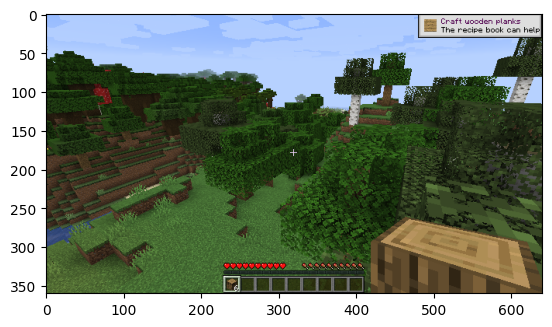

In [ ]:
plt.imshow(replay[-1])

In [ ]:
import os
import cv2

file_path='saveVideo.mp4'
size=(640,360)
fps = 60

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
videoWriter = cv2.VideoWriter(file_path,fourcc,fps,size)

for item in replay:
    b, g, r = cv2.split(item)
    img = cv2.merge([r, g, b])
    #img = cv2.imread(item)
    videoWriter.write(img)

videoWriter.release()

In [ ]:
!pip install -U kora

In [ ]:
from kora.drive import upload_public

url = upload_public('saveVideo.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

#Imitation Learning

In [ ]:
import torch
import torch.nn as nn

def dataset_action_batch_to_actions(dataset_actions, camera_margin=5):
    camera_actions = dataset_actions["camera"].squeeze()
    attack_actions = dataset_actions["attack"].squeeze()
    forward_actions = dataset_actions["forward"].squeeze()
    jump_actions = dataset_actions["jump"].squeeze()
    batch_size = len(camera_actions)
    actions = np.zeros((batch_size,), dtype=int)

    for i in range(len(camera_actions)):
        if camera_actions[i][0] < -camera_margin:
            actions[i] = 3
        elif camera_actions[i][0] > camera_margin:
            actions[i] = 4
        elif camera_actions[i][1] > camera_margin:
            actions[i] = 5
        elif camera_actions[i][1] < -camera_margin:
            actions[i] = 6
        elif forward_actions[i] == 1:
            if jump_actions[i] == 1:
                actions[i] = 2
            else:
                actions[i] = 1
        elif attack_actions[i] == 1:
            actions[i] = 0
        else:
            actions[i] = -1
    return actions

class ActionShaping(gym.ActionWrapper):
    def __init__(self, env, camera_angle=10):
        super().__init__(env)
        self.camera_angle = camera_angle
        self._actions = [
            [('attack', 1)],
            [('forward', 1)],
            [('jump', 1)],
            [('camera', [-self.camera_angle, 0])],
            [('camera', [self.camera_angle, 0])],
            [('camera', [0, self.camera_angle])],
            [('camera', [0, -self.camera_angle])],
        ]
        self.actions = []
        for actions in self._actions:
            act = self.env.action_space.noop()
            for a, v in actions:
                act[a] = v
                act['attack'] = 1
            self.actions.append(act)
        self.action_space = gym.spaces.Discrete(len(self.actions))

    def action(self, action):
        return self.actions[action]

In [ ]:
# Get data
minerl.data.download(directory='data', environment='MineRLObtainDiamond-v0')
data = minerl.data.make("MineRLObtainDiamond-v0", data_dir='data', num_workers=2)

In [ ]:
device

In [ ]:
# model = DQN(input_shape, output_dim).to(device)
# model.load_state_dict(torch.load('/content/model.pth'))
# model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Training loop
step = 0
losses = []
for state, action, _, _, _ \
          in tqdm(data.batch_iter(num_epochs=6, batch_size=32, seq_len=1)):
    # Get pov observations
    obs = state['pov'].squeeze().astype(np.float32)
    # Transpose and normalize
    obs = obs.transpose(0, 3, 1, 2) / 255.0

    # Translate batch of actions for the ActionShaping wrapper
    actions = dataset_action_batch_to_actions(action)

    # Remove samples with no corresponding action
    mask = actions != -1
    obs = obs[mask]
    actions = actions[mask]

    # Update weights with backprop
    logits = model(torch.from_numpy(obs).float().cuda())
    loss = criterion(logits, torch.from_numpy(actions).long().cuda())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    step += 1
    losses.append(loss.item())
    if (step % 2000) == 0:
        mean_loss = sum(losses) / len(losses)
        tqdm.write(f'Step {step:>5} | Training loss = {mean_loss:.3f}')
        losses.clear()

# torch.save(model.state_dict(), 'model.pth')

In [ ]:
torch.save(model.state_dict(), 'treechop.pth')

In [ ]:
del data

#customised scenario

In [ ]:
from minerl.herobraine.env_specs.human_controls import SimpleHumanEmbodimentEnvSpec
from minerl.herobraine.hero.mc import MS_PER_STEP, STEPS_PER_MS
from minerl.herobraine.hero.handler import Handler
from typing import List

import minerl.herobraine
import minerl.herobraine.hero.handlers as handlers
from minerl.herobraine.env_spec import EnvSpec
from minerl.herobraine.hero.mc import MS_PER_STEP, STEPS_PER_MS, ALL_ITEMS
from minerl.herobraine.hero import handlers as H, mc
from minerl.herobraine.hero.handlers.translation import TranslationHandler

MY_TREECHOP_DOC = """
In treechop, the agent must collect 64 `minercaft:log`. This replicates a common scenario in Minecraft, as logs are necessary to craft a large amount of items in the game, and are a key resource in Minecraft.

The agent begins in a forest biome (near many trees) with an iron axe for cutting trees. The agent is given +1 reward for obtaining each unit of wood, and the episode terminates once the agent obtains 64 units.
"""
TREECHOP_LENGTH = 8000
TREECHOP_WORLD_GENERATOR_OPTIONS = """{"coordinateScale":684.412,"heightScale":684.412,"lowerLimitScale":512.0,"upperLimitScale":512.0,"depthNoiseScaleX":200.0,"depthNoiseScaleZ":200.0,"depthNoiseScaleExponent":0.5,"mainNoiseScaleX":80.0,"mainNoiseScaleY":160.0,"mainNoiseScaleZ":80.0,"baseSize":8.5,"stretchY":12.0,"biomeDepthWeight":1.0,"biomeDepthOffset":0.0,"biomeScaleWeight":1.0,"biomeScaleOffset":0.0,"seaLevel":1,"useCaves":false,"useDungeons":false,"dungeonChance":8,"useStrongholds":false,"useVillages":false,"useMineShafts":false,"useTemples":false,"useMonuments":false,"useMansions":false,"useRavines":false,"useWaterLakes":false,"waterLakeChance":4,"useLavaLakes":false,"lavaLakeChance":80,"useLavaOceans":false,"fixedBiome":4,"biomeSize":4,"riverSize":1,"dirtSize":33,"dirtCount":10,"dirtMinHeight":0,"dirtMaxHeight":256,"gravelSize":33,"gravelCount":8,"gravelMinHeight":0,"gravelMaxHeight":256,"graniteSize":33,"graniteCount":10,"graniteMinHeight":0,"graniteMaxHeight":80,"dioriteSize":33,"dioriteCount":10,"dioriteMinHeight":0,"dioriteMaxHeight":80,"andesiteSize":33,"andesiteCount":10,"andesiteMinHeight":0,"andesiteMaxHeight":80,"coalSize":17,"coalCount":20,"coalMinHeight":0,"coalMaxHeight":128,"ironSize":9,"ironCount":20,"ironMinHeight":0,"ironMaxHeight":64,"goldSize":9,"goldCount":2,"goldMinHeight":0,"goldMaxHeight":32,"redstoneSize":8,"redstoneCount":8,"redstoneMinHeight":0,"redstoneMaxHeight":16,"diamondSize":8,"diamondCount":1,"diamondMinHeight":0,"diamondMaxHeight":16,"lapisSize":7,"lapisCount":1,"lapisCenterHeight":16,"lapisSpread":16}"""


class MyTreechop(SimpleHumanEmbodimentEnvSpec):
    def __init__(self, *args, **kwargs):
        if 'name' not in kwargs:
            kwargs['name'] = 'MyMineRLTreechop-v0'

        super().__init__(*args,
                         max_episode_steps=TREECHOP_LENGTH, reward_threshold=64.0,resolution=[640, 360],
                         **kwargs)

    def create_observables(self) -> List[Handler]:
        return super().create_observables() + [
            handlers.EquippedItemObservation(
                items=ALL_ITEMS,
                mainhand=True,
                offhand=True,
                armor=True,
                _default="air",
                _other="air",
            ),
            handlers.ObservationFromLifeStats(),
            handlers.ObservationFromCurrentLocation(),
            handlers.ObserveFromFullStats("use_item"),
            handlers.ObserveFromFullStats("drop"),
            handlers.ObserveFromFullStats("pickup"),
            handlers.ObserveFromFullStats("break_item"),
            handlers.ObserveFromFullStats("craft_item"),
            handlers.ObserveFromFullStats("mine_block"),
            handlers.ObserveFromFullStats("damage_dealt"),
            handlers.ObserveFromFullStats("entity_killed_by"),
            handlers.ObserveFromFullStats("kill_entity"),
            handlers.ObserveFromFullStats(None),
        ]

    def create_actionables(self) -> List[TranslationHandler]:
        """
        Simple envs have some basic keyboard control functionality, but
        not all.
        """
        return [
           H.KeybasedCommandAction(v, v) for v in mc.KEYMAP.values()
        ] + [H.CameraAction()]

    def create_rewardables(self) -> List[Handler]:
        return [
            handlers.RewardForCollectingItems([
                dict(type="log", amount=1, reward=1.0),
            ])
        ]

    def create_agent_start(self) -> List[Handler]:
        return super().create_agent_start() + [
            handlers.SimpleInventoryAgentStart([
                dict(type="oak_log", quantity=30)
            ])
        ]

    def create_agent_handlers(self) -> List[Handler]:
        return [
            handlers.AgentQuitFromPossessingItem([
                dict(type="log", amount=64)]
            )
        ]

    def create_server_world_generators(self) -> List[Handler]:
        return [
            handlers.DefaultWorldGenerator(force_reset="true",
                                           generator_options=TREECHOP_WORLD_GENERATOR_OPTIONS
                                           )
        ]

    def create_server_quit_producers(self) -> List[Handler]:
        return [
            handlers.ServerQuitFromTimeUp(
                (TREECHOP_LENGTH * MS_PER_STEP)),
            handlers.ServerQuitWhenAnyAgentFinishes()
        ]

    def create_server_decorators(self) -> List[Handler]:
        return []

    def create_server_initial_conditions(self) -> List[Handler]:
        return [
            handlers.TimeInitialCondition(
                allow_passage_of_time=False
            ),
            handlers.SpawningInitialCondition(
                allow_spawning=True
            )
        ]

    def determine_success_from_rewards(self, rewards: list) -> bool:
        return sum(rewards) >= self.reward_threshold

    def is_from_folder(self, folder: str) -> bool:
        return folder == 'survivaltreechop'

    def get_docstring(self):
        return MY_TREECHOP_DOC

In [ ]:
import gym

from minerl.herobraine.env_spec import EnvSpec

#MINERL_MY_TEST_V0 = MyTestlEnvSpec_2()
MINERL_MY_TREECHOP_V0 = MyTreechop()

# Register the envs.
ENVS = [env for env in locals().values() if isinstance(env, EnvSpec)]
for env in ENVS:
    if env.name not in gym.envs.registry.env_specs:
        env.register()

In [ ]:
# import gym

# # In order to use the environment as a gym you need to register it with gym
# abs_MLG = MyTreechop()
# abs_MLG.register()
# env = gym.make("MyMineRLNavigate-v0")

# # this line might take a couple minutes to run
# # obs  = env.reset()

# # Renders the environment with the agent taking noops
# # done = False
# # while not done:
# #     env.render()
# #     # a dictionary of actions. Try indexing it and changing values.
# #     action = env.action_space.noop()
# #     obs, reward, done, info = env.step(action)

#Observation


In [ ]:
import logging

import jinja2
from minerl.herobraine.hero.handlers.translation import TranslationHandler
import numpy as np
from minerl.herobraine.hero import spaces
import minerl.herobraine.hero.mc as mc
from minerl.herobraine.hero.handlers.translation import KeymapTranslationHandler


In [ ]:
class VoxelObservation(KeymapTranslationHandler):
    """
    Handles voxel observations.
    Returned voxels are in (x, y, z) order, where x, y, z are all in ascending order.
    """

    def to_hero(self, x) -> str:
        pass

    def to_string(self):
        return "voxels"

    def xml_template(self) -> str:
        return str(
            """
            <ObservationFromGrid>
                <Grid name="voxels">
                    <min x="{{xmin}}" y="{{ymin}}" z="{{zmin}}"/>
                    <max x="{{xmax}}" y="{{ymax}}" z="{{zmax}}"/>
                </Grid>
            </ObservationFromGrid>"""
        )

    def __init__(self, limits=((-3, 3), (-1, 3), (-3, 3))):
        self.xmin = limits[0][0]
        self.ymin = limits[1][0]
        self.zmin = limits[2][0]
        self.xmax = limits[0][1]
        self.ymax = limits[1][1]
        self.zmax = limits[2][1]
        self.grid_size = [1 + b - a for a, b in limits]

        space = spaces.Dict(
            {
                "block_name": spaces.Text(shape=self.grid_size),
                # max block meta is 120, i.e., item id 383:120 spawn egg for villager
                # see https://minecraft-ids.grahamedgecombe.com/
                "block_meta": spaces.Box(
                    low=0, high=120, shape=self.grid_size, dtype=np.int64
                ),
                "is_collidable": spaces.Box(
                    low=0, high=1, shape=self.grid_size, dtype=bool
                ),
                "is_tool_not_required": spaces.Box(
                    low=0, high=1, shape=self.grid_size, dtype=bool
                ),
                "blocks_movement": spaces.Box(
                    low=0, high=1, shape=self.grid_size, dtype=bool
                ),
                "is_liquid": spaces.Box(
                    low=0, high=1, shape=self.grid_size, dtype=bool
                ),
                "is_solid": spaces.Box(low=0, high=1, shape=self.grid_size, dtype=bool),
                "can_burn": spaces.Box(low=0, high=1, shape=self.grid_size, dtype=bool),
                "blocks_light": spaces.Box(
                    low=0, high=1, shape=self.grid_size, dtype=bool
                ),
                "cos_look_vec_angle": spaces.Box(
                    low=-1, high=1, shape=self.grid_size, dtype=np.float32
                ),
            }
        )
        # gym.space.Dict will sort keys! So we keep the order by ourselves
        self._key_list = [
            "block_name",
            "block_meta",
            "is_collidable",
            "is_tool_not_required",
            "blocks_movement",
            "is_liquid",
            "is_solid",
            "can_burn",
            "blocks_light",
            "cos_look_vec_angle",
        ]
        super().__init__(hero_keys=["voxels"], univ_keys=["voxels"], space=space)

    def from_hero(self, obs):
        #print(info)
        print(obs.keys())
        voxels_arr = obs[self.hero_keys[0]]
        assert len(voxels_arr) == np.prod(self.grid_size) * len(
            self._key_list
        ), "INTERNAL"
        # yunfan: note that returns from java side are in F order, we need to use F order to be consistent
        return {
            key: np.array(
                [
                    voxels_arr[i]
                    for i in range(bias, len(voxels_arr), len(self._key_list))
                ],
                dtype=self.space[key].dtype,
            ).reshape(self.space[key].shape, order="F")
            for bias, key in enumerate(self._key_list)
        }

    def __or__(self, other):
        """
        Combines two voxel observations into one. If all of the properties match return self
        otherwise raise an exception.
        """
        if (
            isinstance(other, VoxelObservation)
            and self.grid_min == other.grid_min
            and self.grid_max == other.grid_max
        ):
            return self
        else:
            raise ValueError("Incompatible observables!")

In [ ]:
from typing import Any

class NearbyToolsObservation(TranslationHandler):
    def to_string(self) -> str:
        return "nearby_tools"

    def xml_template(self) -> str:
        return ""

    def __init__(self):
        space = spaces.Dict(
            {
                "table": spaces.Box(low=0, high=1, dtype=bool, shape=()),
                "furnace": spaces.Box(low=0, high=1, dtype=bool, shape=()),
            }
        )
        super().__init__(space=space)

    def from_hero(self, x: dict[str, Any]):
        print(x.keys())
        return {
            "table": np.array(x["nearby_crafting_table"], dtype=bool),
            "furnace": np.array(x["nearby_furnace"], dtype=bool),
        }

In [ ]:
obs.keys()

dict_keys(['pov', 'inventory', 'location_stats', 'finventory'])

In [ ]:
env.close()

In [ ]:
obs['life_stats']

{'air': array(300),
 'food': array(20),
 'is_alive': array(True),
 'life': array(20.),
 'saturation': array(5.),
 'score': array(0),
 'xp': array(0)}

In [ ]:
len(obs['location_stats'])

NameError: ignored

#VPT

In [ ]:
%%capture
!pip3 install gym3
!git clone https://github.com/openai/video-pre-training
%cd video-pre-training

In [ ]:
# from minerl.herobraine.env_specs.human_survival_specs import HumanSurvival as Env

# display = Display(visible=0, size=(720, 480))
# display.start()
# env = Env(resolution=[640, 360], fov_range=[70., 70.], guiscale_range=[1., 1.]).make()
# env = Recorder(env, "./video", fps=30)

In [ ]:
%%capture
weights_file = "https://openaipublic.blob.core.windows.net/minecraft-rl/models/rl-from-early-game-2x.weights"  #@param {type: "string", allow-input:true} ["https://openaipublic.blob.core.windows.net/minecraft-rl/models/foundation-model-1x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/foundation-model-2x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/foundation-model-1x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/bc-house-3x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/bc-early-game-2x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/bc-early-game-3x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/rl-from-foundation-2x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/rl-from-house-2x.weights", "https://openaipublic.blob.core.windows.net/minecraft-rl/models/rl-from-early-game-2x.weights"]
multiplier = [x for x in ["1x", "2x", "3x"] if x in weights_file][0]
!wget {weights_file} -O model
!wget https://openaipublic.blob.core.windows.net/minecraft-rl/models/{multiplier}.model -O model
!wget {weights_file} -O weights

In [ ]:
%cd video-pre-training

from agent import MineRLAgent
import pickle
import torch
from lib.policy import MinecraftAgentPolicy
from lib.tree_util import tree_map
from lib.action_mapping import CameraHierarchicalMapping
from gym3.types import DictType

class VPTAgent(MineRLAgent):
    def __init__(self, env, device=None, policy_kwargs=None, pi_head_kwargs=None) -> None:
        super().__init__(env, device=None, policy_kwargs=None, pi_head_kwargs=None)

    def get_action(self, minerl_obs):
        agent_input = self._env_obs_to_agent(minerl_obs)

        agent_action, self.hidden_state, result = self.policy.act(
            agent_input, self._dummy_first, self.hidden_state,
            stochastic=True, return_pd=True
        )
        minerl_action = self._agent_action_to_env(agent_action)

        # actions = {'buttons': result["pd"]['buttons'].squeeze(0).max(1)[1].view(1, 1), 'camera': result["pd"]['camera'].squeeze(0).max(1)[1].view(1, 1)}
        # minerl_action = super()._agent_action_to_env(actions)

        return minerl_action, agent_action, result

    def preprocess(self, obs, shape=(64, 64)):
        pov = obs['pov']
        pov = cv2.resize(pov, shape).astype(np.float32)
        state = pov.transpose(2, 0, 1) / 255.0
        state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

        return state

    def net_action(state, model):
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return model(state)[0].max(1)[1].view(1, 1), model(state)[1].max(1)[1].view(1, 1)

    def get_agent_action(self, obs, model, hidden, deterministic=False, preprocess_shape=(64, 64)):
        state = self.preprocess(obs, preprocess_shape)
        camera_output, buttons_ouput, hidden_new  = model(state, hidden)
        # buttons_ouput = buttons_ouput.max(1)[1].view(1, 1)
        camera_output = camera_output.max(1)[1].view(1, 1)
        buttons_ouput = self.sample(buttons_ouput.unsqueeze(0), deterministic)
        # camera_output = self.sample(camera_output.unsqueeze(0), deterministic)
        actions = {'buttons': buttons_ouput, 'camera': camera_output}
        # print(actions)
        minerl_action = super()._agent_action_to_env(actions)

        return minerl_action, hidden_new

    def get_agent_output(self, obs, model, hidden):
        state = self.preprocess(obs)
        camera_output, buttons_ouput, hidden_new  = model(state, hidden)
        actions = {'buttons': buttons_ouput, 'camera': camera_output}

        return actions, hidden_new

    def sample(self, logits: torch.Tensor, deterministic: bool = False):
        if deterministic:
            return torch.argmax(logits, dim=-1)
        else:
            # Gumbel-Softmax trick.
            u = torch.rand_like(logits)
            # In float16, if you have around 2^{float_mantissa_bits} logits, sometimes you'll sample 1.0
            # Then the log(-log(1.0)) will give -inf when it should give +inf
            # This is a silly hack to get around that.
            # This hack does not skew the probability distribution, because this event can't possibly win the argmax.
            u[u == 1.0] = 0.999

            return torch.argmax(logits - torch.log(-torch.log(u)), dim=-1)

    def gaussian_sample(self, pd_params: torch.Tensor, deterministic: bool = False) -> torch.Tensor:
        means = pd_params[..., 0]
        log_std = pd_params[..., 1]

        if deterministic:
            return means
        else:
            return torch.randn_like(means) * torch.exp(log_std) + means


[Errno 2] No such file or directory: 'video-pre-training'
/content/video-pre-training


In [ ]:
agent_parameters = pickle.load(open("model", "rb"))
policy_kwargs = agent_parameters["model"]["args"]["net"]["args"]
pi_head_kwargs = agent_parameters["model"]["args"]["pi_head_opts"]
pi_head_kwargs["temperature"] = float(pi_head_kwargs["temperature"])

#Knowledge Distillation

In [ ]:
env.seed(10)
obs = env.reset()

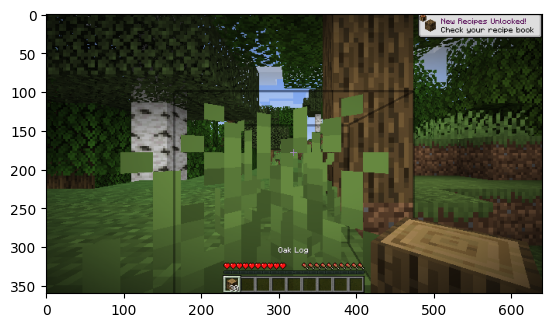

In [ ]:
plt.imshow(obs['pov'])

##1

In [ ]:
result["pd"]['camera'].squeeze(0).max(1)[1].view(1, 1)

tensor([[61]], device='cuda:0')

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
from tqdm.auto import trange

wooden_pickaxe_dataset = []

while len(wooden_pickaxe_dataset) < 16:
    print(len(wooden_pickaxe_dataset))
    env.seed(10)
    obs = env.reset()
    agent = VPTAgent(env, policy_kwargs=policy_kwargs, pi_head_kwargs=pi_head_kwargs, device="cuda" if torch.cuda.is_available() else "cpu")
    agent.load_weights("weights")
    record = []
    actions = []
    play_steps = 1000
    live_display = False
    try:
        for _ in trange(play_steps):  # The t part will get erased anyway
            minerl_action, agent_action, result = agent.get_action(obs)
            obs, reward, done, info = env.step(minerl_action)

            #if np.mean(cv2.cvtColor(obs['pov'][0:99], cv2.COLOR_BGR2GRAY)) < 40:
            record.append(obs['pov'])
            actions.append(result['pd'])

            if obs['equipped_items']['mainhand']['type'] == 'wooden_pickaxe':
                print('Agent got the wooden_pickaxe!')
                wooden_pickaxe_dataset.append({'pov': record, 'pd': actions})
                done = True

            if done:
                break

            if live_display:
                clear_output(wait=True)
                plt.axis("off")
                plt.imshow(obs["pov"])
                plt.show()
    except KeyboardInterrupt:
        pass

0


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
1


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
2


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
3


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
4


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
5


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
6


  0%|          | 0/1000 [00:00<?, ?it/s]

6


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
7


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
8


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
9


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
10


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
11


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
12


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
13


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
14


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!
15


  0%|          | 0/1000 [00:00<?, ?it/s]

Agent got the wooden_pickaxe!


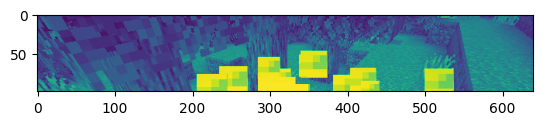

In [ ]:
plt.imshow(cv2.cvtColor(record[200][0:99], cv2.COLOR_BGR2GRAY))

##2

In [ ]:
student_model = DQNLstm(input_shape, output_dim).to(device)

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
from tqdm.auto import trange
import torch.optim.lr_scheduler as lr_scheduler


optimizer = torch.optim.Adam(student_model.parameters(), lr=0.0001)
losses = []

record= []
play_steps = 1000
episodes = 10

try:
    for i in range(episodes):
        env.seed(10)
        obs = env.reset()
        done = False
        teacher_model = VPTAgent(env, policy_kwargs=policy_kwargs, pi_head_kwargs=pi_head_kwargs, device="cuda" if torch.cuda.is_available() else "cpu")
        teacher_model.load_weights("weights")

        h0 = torch.zeros(2, 1, 512).to(device)
        c0 = torch.zeros(2, 1, 512).to(device)
        hidden = (h0, c0)

        print('Env reset done. Episode: ' + str(i))

        for _ in trange(play_steps):  # The t part will get erased anyway
            minerl_action, agent_action, result = teacher_model.get_action(obs)

            actions, hidden_new = teacher_model.get_agent_output(obs, student_model, hidden)
            hidden_new = (hidden_new[0].detach(), hidden_new[1].detach())
            hidden = hidden_new

            # Update weights with backprop

            loss_buttons = policy_distillation_loss(result['pd']['buttons'].squeeze(0), actions['buttons'], temperature=1.5)
            loss_camera = policy_distillation_loss(result['pd']['camera'].squeeze(0), actions['camera'], temperature=1.5)

            total_loss = loss_buttons + loss_camera
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            losses.append(total_loss.item())

            # Next step
            obs, reward, done, info = env.step(minerl_action)
            #record.append(obs)

            if obs['equipped_items']['mainhand']['type'] == 'wooden_pickaxe':
                print('Agent got the wooden_pickaxe!')
                done = True

            if done:
                break

        mean_loss = sum(losses) / len(losses)
        tqdm.write(f'Training loss = {mean_loss:.3f}')
        losses.clear()

except KeyboardInterrupt:
    pass

##3

In [ ]:
student_model = DQNLstm(input_shape, output_dim).to(device)
student_model.load_state_dict(torch.load('/content/woodenPickaxe_1.pth'))
student_model.eval()

DQNLstm(
  (cnn): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=1024, out_features=512, bias=True)
    (11): ReLU()
  )
  (lstm): LSTM(512, 512, num_layers=2, batch_first=True)
  (camera): Linear(in_features=512, out_features=121, bias=True)
  (buttons): Linear(in_features=512, out_features=8641, bias=True)
)

In [ ]:
student_model = CnnLstm((3, 128, 128)).to(device)
student_model.load_state_dict(torch.load('/content/woodenPickaxe_10.pth'))
student_model.eval()

CnnLstm(
  (cnn): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (flatten): Linear(in_features=21632, out_features=512, bias=True)
  (lstm): LSTM(512, 512, num_layers=2, batch_first=True)
  (camera): Linear(in_features=512, out_features=121, bias=True)
  (buttons): Linear(in_features=512, out_features=8641, bias=True)
)

In [ ]:
import torch.nn.functional as F

def action_step(action):
  ac = env.action_space.noop()
  ac.update(action)
  obs, reward, done, info = env.step(ac)
  plt.imshow(obs["pov"])
  plt.show()

def policy_distillation_loss(outputs_teacher, outputs_student, temperature):
    # KL loss
    KD_loss = F.kl_div(
        F.log_softmax(outputs_student/temperature, dim=1),
        F.softmax(outputs_teacher/temperature, dim=1),
        reduction='batchmean') * temperature * temperature

    return KD_loss

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
from tqdm.auto import trange
import torch.optim.lr_scheduler as lr_scheduler
from collections import namedtuple, deque
import random


optimizer = torch.optim.Adam(student_model.parameters(), lr=0.00001)
losses = []

record= []
episodes = 40
student_model.train()

batch_size = 32
buffer = deque(maxlen=500)

try:
    for i in range(episodes):
        print('Episode: ' + str(i))

        for i in trange(len(wooden_pickaxe_dataset)):
            povs = wooden_pickaxe_dataset[i]['pov']
            pds = wooden_pickaxe_dataset[i]['pd']

            h0 = torch.zeros(2, 1, 512).to(device)
            c0 = torch.zeros(2, 1, 512).to(device)
            hidden = (h0, c0)

            for i in range(len(povs)):
                pov = povs[i]
                result = pds[i]

                pov = cv2.resize(pov, (128, 128)).astype(np.float32)
                state = pov.transpose(2, 0, 1) / 255.0
                state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
                #print(state.shape)

                camera_output, buttons_ouput, hidden_new  = student_model(state, hidden)
                hidden_new = (hidden_new[0].detach(), hidden_new[1].detach())
                hidden = hidden_new

                loss_buttons = policy_distillation_loss(result['buttons'].squeeze(0), buttons_ouput, temperature=3)
                loss_camera = policy_distillation_loss(result['camera'].squeeze(0), camera_output, temperature=3)
                total_loss = loss_buttons + loss_camera

                optimizer.zero_grad()
                total_loss.backward()
                optimizer.step()
                losses.append(total_loss.item())

                # buffer.append((result['buttons'].squeeze(0), buttons_ouput,
                #                result['camera'].squeeze(0), camera_output))

                # if len(buffer) >= batch_size:
                #     batch = random.sample(buffer, batch_size)
                #     loss_buttons = 0
                #     loss_camera = 0

                #     for buttons_t, buttons_s, camera_t, camera_s in batch:
                #         buttons_t = buttons_t.to(device)
                #         buttons_s = buttons_s.to(device)
                #         camera_t = camera_t.to(device)
                #         camera_s = camera_s.to(device)

                #         loss_buttons += policy_distillation_loss(buttons_t, buttons_s, temperature=3)
                #         loss_camera += policy_distillation_loss(camera_t, camera_s, temperature=3)

                #     total_loss = loss_buttons / batch_size + loss_camera / batch_size
                #     optimizer.zero_grad()
                #     total_loss.backward(retain_graph=True)
                #     optimizer.step()

                #     losses.append(total_loss.item())

        mean_loss = sum(losses) / len(losses)
        tqdm.write(f'Training loss = {mean_loss:.3f}')
        losses.clear()

except KeyboardInterrupt:
    pass

Episode: 0


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 1.105
Episode: 1


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.990
Episode: 2


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.951
Episode: 3


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.921
Episode: 4


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.903
Episode: 5


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.888
Episode: 6


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.880
Episode: 7


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.867
Episode: 8


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.856
Episode: 9


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.846
Episode: 10


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.838
Episode: 11


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.837
Episode: 12


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.822
Episode: 13


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.815
Episode: 14


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.806
Episode: 15


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.799
Episode: 16


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.795
Episode: 17


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.785
Episode: 18


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.773
Episode: 19


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.769
Episode: 20


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.765
Episode: 21


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.758
Episode: 22


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.750
Episode: 23


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.753
Episode: 24


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.741
Episode: 25


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.741
Episode: 26


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.734
Episode: 27


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.726
Episode: 28


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.727
Episode: 29


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.714
Episode: 30


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.709
Episode: 31


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.702
Episode: 32


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.693
Episode: 33


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.693
Episode: 34


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.683
Episode: 35


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.673
Episode: 36


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.674
Episode: 37


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.658
Episode: 38


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.672
Episode: 39


  0%|          | 0/16 [00:00<?, ?it/s]

Training loss = 0.669


In [ ]:
torch.save(student_model.state_dict(), 'woodenPickaxe_10.pth')

##4

In [ ]:
env.seed(10)
obs = env.reset()

In [ ]:
from tqdm.auto import trange

record = []
actions = []
play_steps = 1500
live_display = False
agent = VPTAgent(env, policy_kwargs=policy_kwargs, pi_head_kwargs=pi_head_kwargs, device="cuda" if torch.cuda.is_available() else "cpu")

h0 = torch.zeros(2, 1, 512).to(device)
c0 = torch.zeros(2, 1, 512).to(device)
hidden = (h0, c0)
student_model.eval()

try:
    for _ in trange(play_steps):  # The t part will get erased anyway
        minerl_action, hidden_new = agent.get_agent_action(obs, student_model, hidden, preprocess_shape=(128, 128))
        hidden = hidden_new
        obs, reward, done, info = env.step(minerl_action)
        record.append(obs['pov'])
        #actions.append(minerl_action)

        if obs['equipped_items']['mainhand']['type'] == 'wooden_pickaxe':
            print('Agent got the wooden_pickaxe!')
            done = True

        if done:
            break

        if live_display:
            clear_output(wait=True)
            plt.axis("off")
            plt.imshow(obs["pov"])
            plt.show()
except KeyboardInterrupt:
    pass

  0%|          | 0/1500 [00:00<?, ?it/s]

In [ ]:
!cp -r /content/video-pre-training/woodenPickaxe.pth /content/drive/MyDrive/AI

In [ ]:
import os
import cv2

file_path='saveVideo.mp4'
size=(640,360)
fps = 30

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
videoWriter = cv2.VideoWriter(file_path,fourcc,fps,size)

for item in record:
    b, g, r = cv2.split(item)
    img = cv2.merge([r, g, b])
    #img = cv2.imread(item)
    videoWriter.write(img)

videoWriter.release()